## Открываем файл с данныими и изучаем общую информацию

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
games = pd.read_csv('***')

Дубликатов:  0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

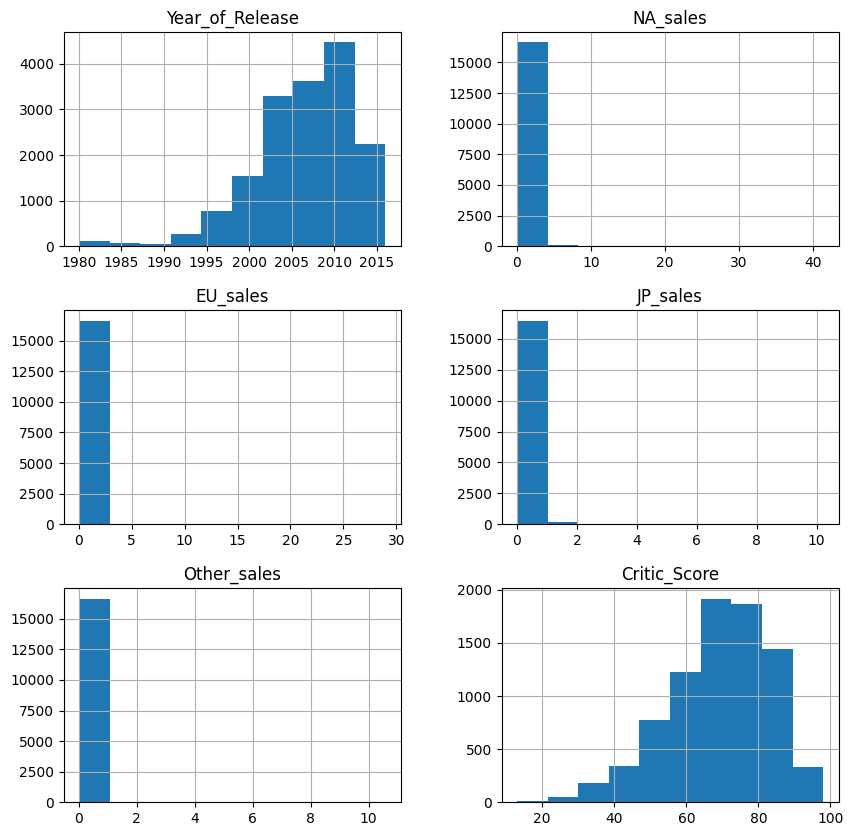

In [ ]:
print('Дубликатов: ',sum(games.duplicated()))
print()
games.info()
display(games.head(10))
display(games.describe())
games.hist(figsize=(10, 10));
games.isna().sum()


In [ ]:
old_games = games.copy()

## Предобработка данных

In [ ]:
games.columns = map(str.lower, games.columns) #Замените названия столбцов (приведите к нижнему регистру)
games.head(0)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


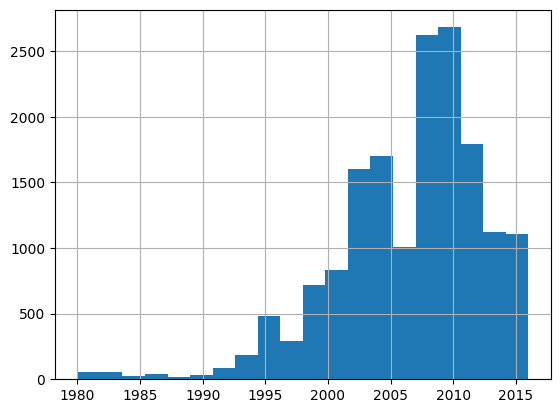

In [ ]:
games['year_of_release'].hist(bins=20);


In [ ]:
games['user_score'].unique()


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
#Преобразуйте данные в нужные типы.
games['user_score'] = games['user_score'].str.replace('tbd','nan')
games['user_score'] = games['user_score'].astype(float)
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [ ]:
games['rating'] = games['rating'].fillna('unknown')

In [ ]:
games.groupby('rating')['rating'].count()

rating
AO            1
E          3990
E10+       1420
EC            8
K-A           3
M          1563
RP            3
T          2961
unknown    6766
Name: rating, dtype: int64

In [ ]:
games['rating'] = games['rating'].str.replace('AO','M')
games['rating'] = games['rating'].str.replace('EC','E')
games['rating'] = games['rating'].str.replace('K-A','E')
games['rating'] = games['rating'].str.replace('RP','uncnown')

In [ ]:
games = games.dropna(subset=['year_of_release'])

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


* Пропуски в оценках и рейтинге не стала трогать, заменять средним, медианой и другими выдуманными значениями не стоит, это исказит данные. Фильтровать их тоже не буду, т.к. потеряю много данных.
* Пропуски по годам тоже не стала трогать, пусть их и мало, но смысла не вижу когда пол датафрейма в нанах.
* В оценках пользователей есть абревиатура tbd, её я заменила на nan, методом replace() . В переводе tbd - Подлежит определению.

In [ ]:
#Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

<ipython-input-15-0a567d4dae46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']


In [ ]:
new_games = games.copy()

In [ ]:
new_games.shape[0] / old_games.shape[0]

0.9839066706551002

In [ ]:
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38



* Мы привели название столбцов к нижнему регистру.
* Пропущенный рейтинг заполнили значением 'unknown'
* Создали новый столбец с суммой всех оценок по странам.
* Объединили схожие рейтинги.
* Удалили пропущенные значение в годе релиза.
* Проверили допустим ли размер удалённых данных

## Исследовательский анализ данных

In [ ]:
games.groupby('year_of_release')['name'].count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

In [ ]:
games.groupby('platform')['all_sales'].agg(['mean']).sort_values(by='mean', ascending=False).head()


,mean
platform,
GB,2.622990
NES,2.561735
GEN,1.061034
SNES,0.836987
PS4,0.801378


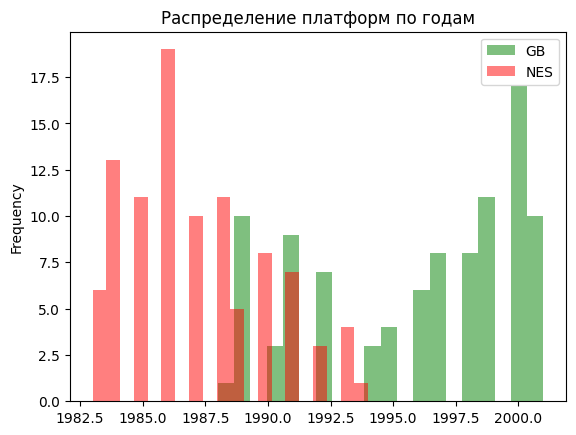

In [ ]:
games[games['platform'] =='GB']['year_of_release'].plot(bins=20, alpha=0.5, color='green', kind='hist', title='Распределение платформ по годам')
games[games['platform'] =='NES']['year_of_release'].plot(bins=20, alpha=0.5, color='red', kind='hist');
plt.legend(['GB', 'NES']);

Платформа NES появилась в 1983 году, а закончила своё существование в конце 1993 года. Платформа GB напротив, начала своё существование 1988 году, а закончила в 2000 году. В промежутке между 1988 годом и 1993 платформа NES пыталась сохранить своё место в игровом мире и боролась с платформой GB. Мы видим что в конце 1989 года у неё это не плохо получилось, но к сожалению она утратила свои позиции и позволила платформе GB занять своё место, на рынке. С 1994 года платформа GB стремительно наращивала свои продажи, пик продаж пришёлся на 2000 год.

In [ ]:
games_min = games.groupby('platform')['year_of_release'].agg(['min'])
games_max = games.groupby('platform')['year_of_release'].agg(['max'])
games_live = games_max['max'] - games_min['min']
print(games_live)

platform
2600     9.0
3DO      1.0
3DS      5.0
DC      10.0
DS      28.0
GB      13.0
GBA      7.0
GC       6.0
GEN      4.0
GG       0.0
N64      6.0
NES     11.0
NG       3.0
PC      31.0
PCFX     0.0
PS       9.0
PS2     11.0
PS3     10.0
PS4      3.0
PSP     11.0
PSV      5.0
SAT      5.0
SCD      1.0
SNES     9.0
TG16     0.0
WS       2.0
Wii     10.0
WiiU     4.0
X360    11.0
XB       8.0
XOne     3.0
dtype: float64


Период жизни платформы NES 11 лет, платформы Gb 13 лет. По графику мы видим что от появления новой платформы, до окончания срока жизни старой платформы - прошло 5 лет

<Axes: xlabel='year_of_release'>

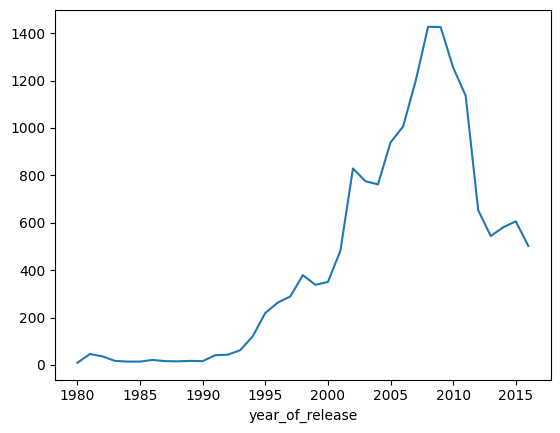

In [ ]:
games.groupby('year_of_release')['all_sales'].count().plot()

Берём 2 года, чтобы получить больше данных, т.к. за 2016 год мало данных. Предпологается что мы делаем анализ в 2016 году на 2017 год, значит данные за 2016 не за весь год, но они есть. Поэтому я решила не исключать его из расчёта.

In [ ]:
limit_max = 2016
limit_min = 2015
current_years_games = games.loc[(games['year_of_release'] >= limit_min ) & (games['year_of_release'] <= limit_max)]
print('Минимальный год:', current_years_games['year_of_release'].min())
print('Максимальный год:', current_years_games['year_of_release'].max())

Минимальный год: 2015.0
Максимальный год: 2016.0


In [ ]:
platform_sales = current_years_games.groupby('platform')['all_sales'].agg(['mean']).sort_values(by='mean', ascending=False).head(5)
display(platform_sales)

,mean
platform,
PS4,0.625083
XOne,0.516707
WiiU,0.498810
3DS,0.325152
X360,0.280833


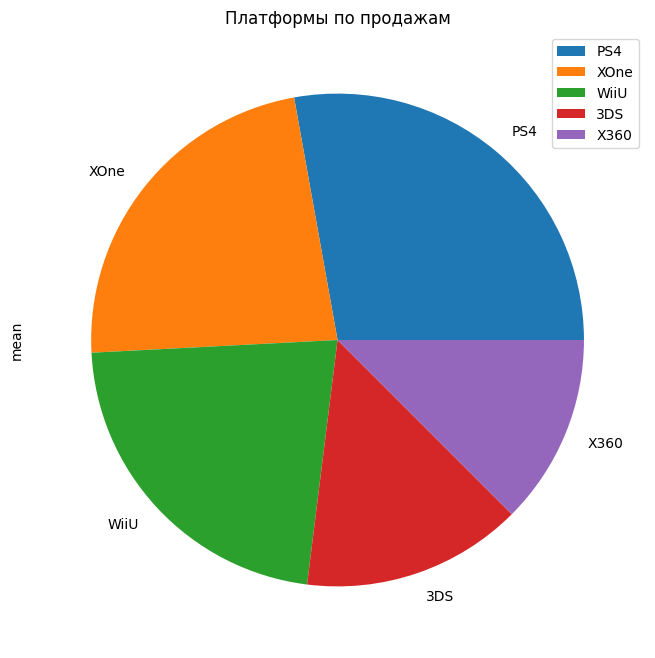

In [ ]:
platform_sales.plot(kind='pie', y='mean',figsize =(8,8), title = 'Платформы по продажам');

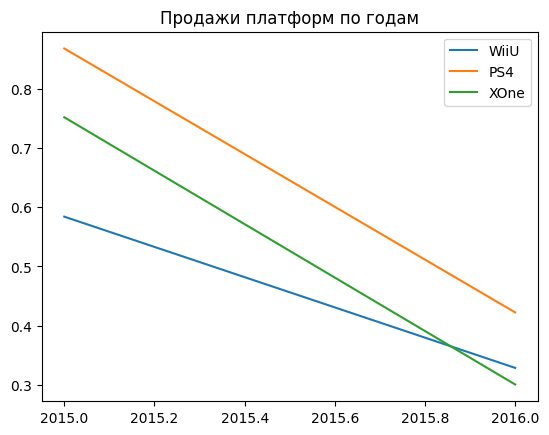

In [ ]:
platform_WiiU = current_years_games[current_years_games['platform'] =='WiiU'].groupby('year_of_release')['all_sales'].agg(['mean'])
platform_PS4 = current_years_games[current_years_games['platform'] =='PS4'].groupby('year_of_release')['all_sales'].agg(['mean'])
platform_XOne = current_years_games[current_years_games['platform'] =='XOne'].groupby('year_of_release')['all_sales'].agg(['mean'])


plt.plot(platform_WiiU)
plt.plot(platform_PS4)
plt.plot(platform_XOne)

plt.title('Продажи платформ по годам')
plt.legend(['WiiU', 'PS4', 'XOne']);

Все приставки имеют серьёзный спад. Но в лидирующей позиции остаётся PS4.

In [ ]:
good_platform_PS4 = current_years_games.loc[current_years_games['platform'].isin(['PS4'])]
good_platform_XOne = current_years_games.loc[current_years_games['platform'].isin(['XOne'])]
good_platform_WiiU = current_years_games.loc[current_years_games['platform'].isin(['WiiU'])]

good_platform = pd.concat([good_platform_PS4, good_platform_XOne, good_platform_WiiU], ignore_index = True)

display(good_platform)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
1,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
2,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
3,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
4,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
5,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
6,Uncharted: The Nathan Drake Collection,PS4,2015.0,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
7,Call of Duty: Infinite Warfare,PS4,2016.0,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
8,Battlefield 1,PS4,2016.0,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07
9,The Witcher 3: Wild Hunt,PS4,2015.0,Role-Playing,1.02,2.13,0.23,0.59,92.0,9.2,M,3.97


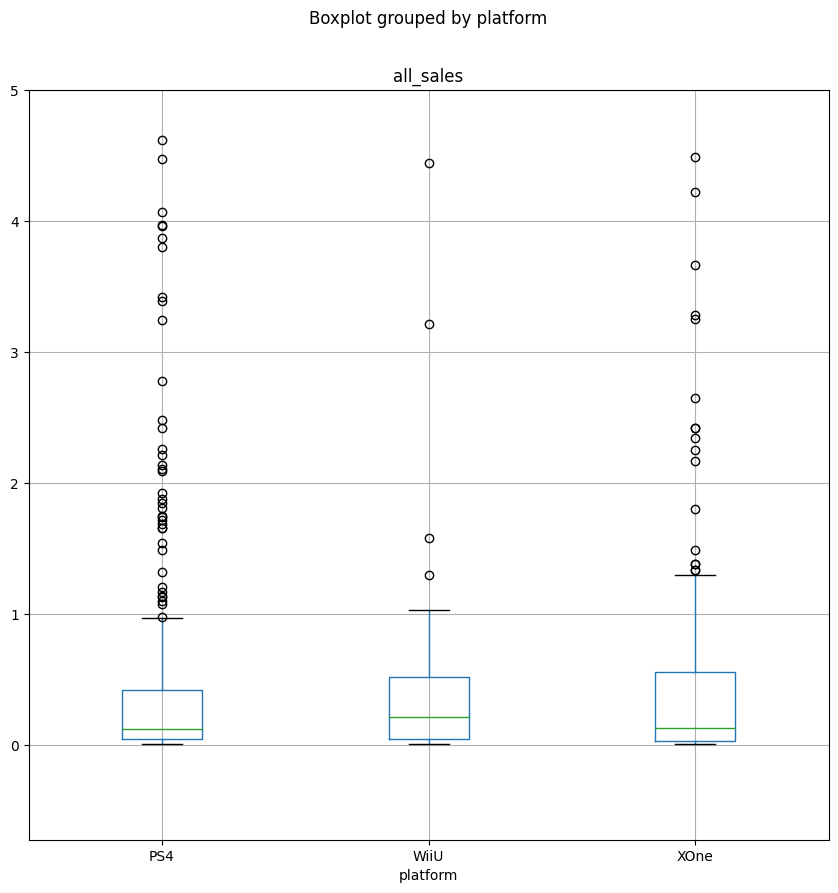

In [ ]:
good_platform.boxplot(column='all_sales', by='platform', figsize=(10,10));
plt.ylim(top=5);

Разброс продаж у Хбокса выше чем у WiiU и Сони.
Сони популярней своих коллег по цеху.
Медианное значение у WiiU выше чем у Сони и Хбокса. У Сони медианное значение чуть ниже чем у Хбокса.

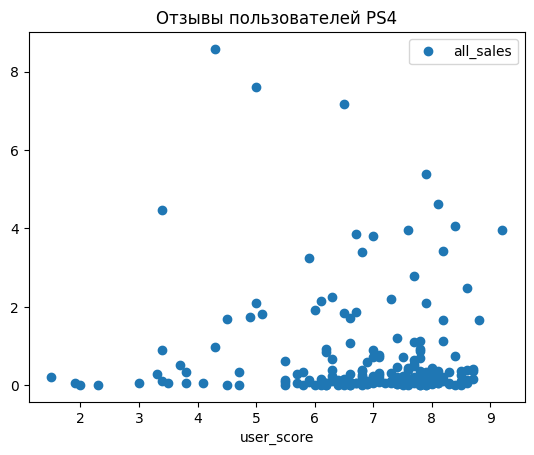

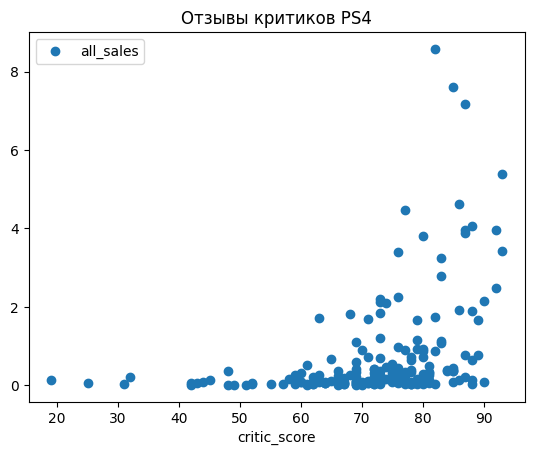

,user_score,critic_score,all_sales
user_score,1.000000,0.533330,-0.059738
critic_score,0.533330,1.000000,0.392849
all_sales,-0.059738,0.392849,1.000000


In [ ]:
good_platform_PS4.plot(x='user_score', y='all_sales', style='o', title='Отзывы пользователей PS4' );
plt.show()
good_platform_PS4.plot(x='critic_score', y='all_sales',style='o', title='Отзывы критиков PS4' );
plt.show()
good_platform_PS4[['user_score', 'critic_score', 'all_sales']].corr()

Оценки пользователей и критиков никак не влияют на продажи

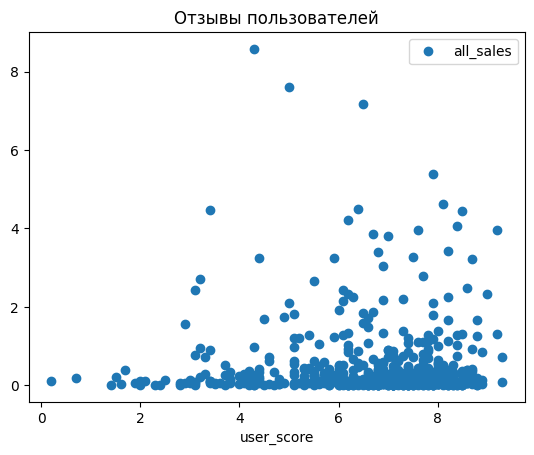

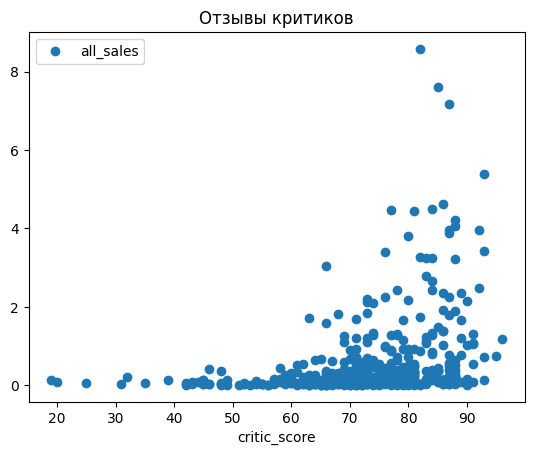

,user_score,critic_score,all_sales
user_score,1.000000,0.467901,-0.001964
critic_score,0.467901,1.000000,0.325527
all_sales,-0.001964,0.325527,1.000000


In [ ]:
current_years_games.plot(x='user_score', y='all_sales', style='o', title='Отзывы пользователей' );
plt.show()
current_years_games.plot(x='critic_score', y='all_sales',style='o', title='Отзывы критиков' );
plt.show()
current_years_games[['user_score', 'critic_score', 'all_sales']].corr()

Зависимость отсутствует.

In [ ]:
current_years_games.groupby('genre')['all_sales'].agg(['mean']).sort_values(by='mean', ascending=False)

,mean
genre,
Shooter,1.305309
Sports,0.601215
Role-Playing,0.422879
Fighting,0.334324
Platform,0.331429
Racing,0.258571
Action,0.236961
Simulation,0.228788
Misc,0.199577


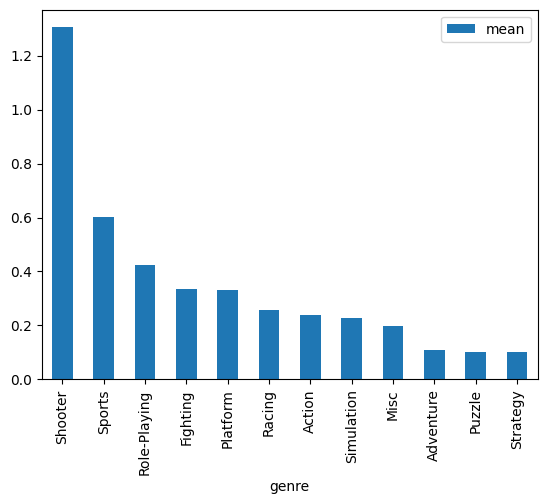

In [ ]:
current_years_games.groupby('genre')['all_sales'].agg(['mean']).sort_values(by='mean', ascending=False).plot(kind='bar');

Жанры с высоким продажами выделяются, так=же как и с низкими. Самые популярные жанры Shooter, Sports, Role-Playing.
Самые не популярные Adventure, Puzzle, Strategy.
За стратегии обидно. Но всё объясняется тем, что в последнее время не выходит хороших стратегий.


In [ ]:
platform_sales

,mean
platform,
PS4,0.625083
XOne,0.516707
WiiU,0.498810
3DS,0.325152
X360,0.280833


In [ ]:
good_platform_3DS = current_years_games.loc[current_years_games['platform'].isin(['3DS'])]
good_platform_X360 = current_years_games.loc[current_years_games['platform'].isin(['X360'])]
top_platform = pd.concat([good_platform_PS4, good_platform_XOne, good_platform_WiiU, good_platform_3DS, good_platform_X360], ignore_index = True)
top_platform['platform'].unique()

array(['PS4', 'XOne', 'WiiU', '3DS', 'X360'], dtype=object)

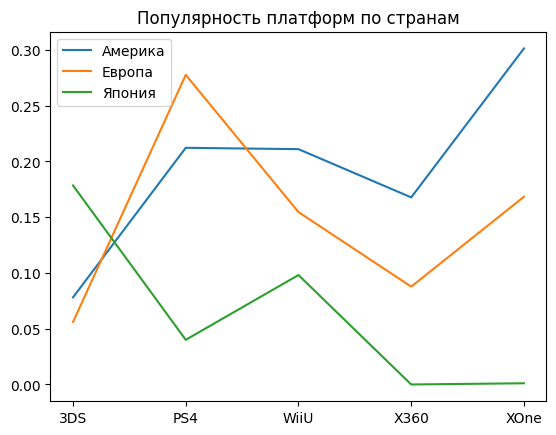

In [ ]:

platform_na_sales = top_platform.groupby('platform')['na_sales'].agg(['mean']).head()
platform_eu_sales = top_platform.groupby('platform')['eu_sales'].agg(['mean']).head()
platform_jp_sales = top_platform.groupby('platform')['jp_sales'].agg(['mean']).head()
plt.plot(platform_na_sales)
plt.plot(platform_eu_sales)
plt.plot(platform_jp_sales)
plt.title('Популярность платформ по странам')
plt.legend(['Америка', 'Европа', 'Япония']);

В северной Америке продаж XOne, а меньше всего 3DS.
В Европе больше всего продаж PS4, а меньше всего 3DS.
В Японии популярна 3DS и совсем не популярны X360 и XOne.

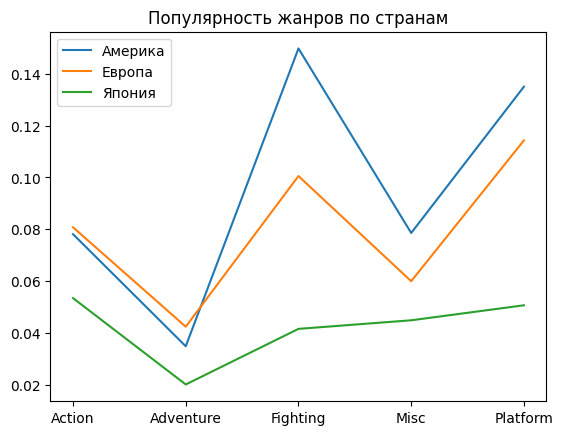

In [ ]:
genre_na_sales = current_years_games.groupby('genre')['na_sales'].agg(['mean']).head()
genre_eu_sales = current_years_games.groupby('genre')['eu_sales'].agg(['mean']).head()
genre_jp_sales = current_years_games.groupby('genre')['jp_sales'].agg(['mean']).head()
plt.plot(genre_na_sales)
plt.plot(genre_eu_sales)
plt.plot(genre_jp_sales)
plt.title('Популярность жанров по странам')
plt.legend(['Америка', 'Европа', 'Япония']);

В Америке и Европе любят жанр Fighting и Platform, не очень любят Adventure и Misc.
В Японии нет особых скачков, почти одинаково относятся ко всем жанрам, но не особо жалуют Adventure.


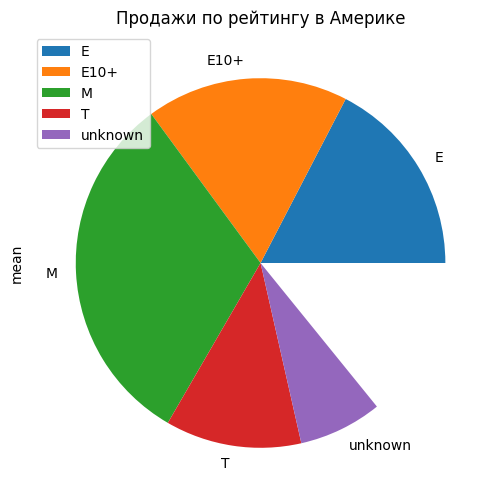

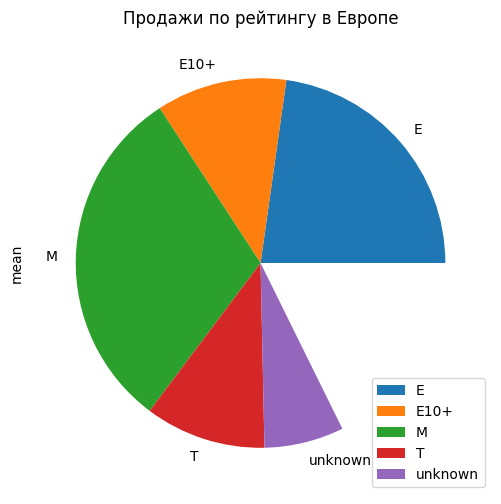

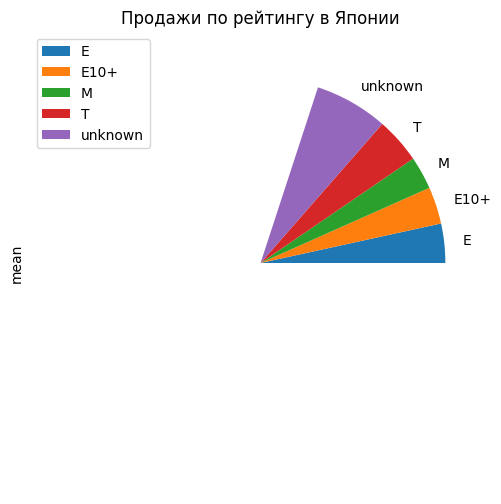

In [ ]:
rating_na_sales = current_years_games.groupby('rating')['na_sales'].agg(['mean']).head()
rating_eu_sales = current_years_games.groupby('rating')['eu_sales'].agg(['mean']).head()
rating_jp_sales = current_years_games.groupby('rating')['jp_sales'].agg(['mean']).head()

rating_na_sales.plot(kind='pie', y='mean',figsize =(6,6), title = 'Продажи по рейтингу в Америке', normalize=False);
plt.show()
rating_eu_sales.plot(kind='pie', y='mean',figsize =(6,6), title = 'Продажи по рейтингу в Европе', normalize=False);
plt.show()
rating_jp_sales.plot(kind='pie', y='mean',figsize =(6,6), title = 'Продажи по рейтингу в Японии', normalize=False);
plt.show()

Как мы видим, в Японии больеше предпочитают игры не имеющие рейтинга.
В Америке и Европе предпочитают играть в игры для взрослых, менее, но значительно продают игры для всех и от 10 лет. А вот игры без рейтинга их особо не интересуют.

## Проверьте гипотезы

In [ ]:
games = games.dropna(subset=['user_score'])

**Первая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

```
H_0: Средние пользовательские рейтинги (user_score) платформ "XOne" = Средние пользовательские рейтинги (user_score) платформ "PC"`
H_a: Средние пользовательские рейтинги (user_score) платформ "XOne" ≠ Средние пользовательские рейтинги (user_score) платформ "PC"`
alpha = 0.05
```

In [ ]:
xone_platform = games[games['platform'] == 'XOne']['user_score']
pc_platform =  games[games['platform'] == 'PC']['user_score']
results = st.ttest_ind(a=xone_platform, b=pc_platform, equal_var = True)

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.3037979620149106e-05
Отвергаем нулевую гипотезу


**Вторая гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.**
```
H_0: Средние пользовательские рейтинги (user_score) жанров "Action" = Средние пользовательские рейтинги (user_score) жанров "Sports"`
H_a: Средние пользовательские рейтинги (user_score) жанров "Action" ≠ Средние пользовательские рейтинги (user_score) жанров "Sports"`
alpha = 0.05
```

In [ ]:
genre_action = games[games['genre'] == 'Action']['user_score']
genre_sports =  games[games['genre'] == 'Sports']['user_score']
results = st.ttest_ind(a=genre_action, b=genre_sports, equal_var = True)

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.06480928064420527
Не получилось отвергнуть нулевую гипотезу


## Вывод

В предобработке, изучении данных и анализе я провела колосальную работу. Заполнили пропуски в рейтингах, отсортировала их по актуальным и не устаревшим данным, добавили и заполнили значения нового стобца, общей информацией по оценкам. Обработала пропущенные года. Провела анализ рынка платформ, чтобы вычислить актуальный период для анализа. Так-же выявили потенциально прибыльные платформы, влияние оценок пользователей и критиков на продажи. Нашла прибыльные жанры и жарны находящиеся в аутсайдерах. Провела анализ пользователей по регионам, их предпочтения в жанрах, в платформах, отношение к рейтингу ESRB.

* Разброс продаж у Хбокса выше чем у WiiU и Сони. Сони популярней своих коллег по цеху.
* Продажи не зависят от оценок пользователе и критиков.
* Жанры с высоким продажами выделяются, так=же как и с низкими. Самые популярные жанры Shooter, Sports, Role-Playing. Самые не популярные Adventure, Puzzle, Strategy

* В северной Америке продаж XOne, а меньше всего 3DS.
* В Европе больше всего продаж PS4, а меньше всего 3DS. В Японии популярна 3DS и совсем не популярны X360 и XOne.

* В Америке и Европе любят жанр Fighting и Platform, не очень любят Adventure и Misc.
* В Японии нет особых скачков, почти одинаково относятся ко всем жанрам, но не особо жалуют Adventure.
* Как мы видим, в Японии больеше предпочитают игры не имеющие рейтинга.
* В Америке и Европе предпочитают играть в игры для взрослых, менее, но значительно продают игры для всех и от 10 лет. А вот игры без рейтинга их особо не интересуют.
* Средние пользовательские рейтинги платформ Xbox One и PC разные.
* Средние пользовательские рейтинги жанров Action и Sports одинаковые.
